In [16]:
#EEGデータのパス
filepath = "/Users/yamamotokouhei/実験データ/1day/EEG_grasping_09-Dec-2020_kei_sub1-3.mat"

In [17]:
from sklearn.decomposition import FastICA
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
import pandas as pd


In [18]:
# dataクラス
class O_Data:
    def __init__(self, eeg, index, label):
        self.eeg = eeg
        self.index = index
        self.label = label
        self.stack = []

    def push(self, item):
        self.stack.append(item)

o_data65 = list()
R_data = list()  #  実運動のデータを格納
RI_data = list()  # 実運動＋想起運動のデータを格納
All_data = list()  # 全データを格納

def Standardization(data): #標準化
    after_data = scipy.stats.zscore(data)
    b = np.average(after_data)
    c = np.var(after_data)
    return after_data

In [19]:
# 変数など
data_directry = ''
file_num = 1

trial_num = 30
all_trial = (file_num) * trial_num
all_d = 0
CH = 64
#EEGデータ
#for s in range(file_num):
#とりあえず1データでICAできるかどうか
Dictionary = scipy.io.loadmat(filepath)
for t in range(trial_num):
    for i, key in enumerate(Dictionary.keys()):
        if i > 2:
            a = Dictionary[key]
            b = a[0, t][0][0]
            eeg = b[0][0:65, :]
            index = b[1]
            samplerate = b[2]
            label = 0

            o_data = O_Data(eeg, index, label)
            o_data65.append(o_data)

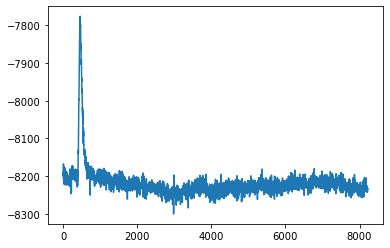

In [20]:
for n in range(1):  # all_trial
    number = list()  # restのindex
    time = list()
    all_d = sum(len(v) for v in o_data65[n].index) - 1
    for i in range(all_d + 1):
        time.append(i)
    eeg = o_data65[n].eeg  # トライアルnのeeg
    index = o_data65[n].index  # トライアルnのindex
    label = o_data65[n].label  # トライアルnのlabel
    for i in range(all_d):
        if index[:, i] == 0:
            number.append(i)
    rest_time = len(number)  # rest時間のindex数

    # 眼電の設定
    onech_eeg = eeg[64, :]  # 一つのチャンネルのeeg
    number = np.array(number)
    time = np.array(time)

    plt.plot(onech_eeg)
    